In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.7/494.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.6 MB/s eta 0:00:00


In [22]:
!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers
import numpy as np

In [56]:
classifier_url ="https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/5"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [35]:
import pathlib
import os
from PIL import Image

BASE_PATH = pathlib.Path("/content")

files_types = [".png", ".jfif"]

for file in os.listdir(pathlib.Path("/content")):
  for f_type in files_types:
    if f_type in file:
      img = Image.open(BASE_PATH / file)
      img = img.convert("RGB")
      img = img.resize(IMAGE_SHAPE)
      img.save(BASE_PATH / f"{file.replace(f_type, '')}.jpg", format="JPEG")
      os.unlink(BASE_PATH / file)

In [70]:
cat = Image.open('/content/cat.jpg').resize(IMAGE_SHAPE)
cat = np.array(cat)/255.0
cat.shape

(224, 224, 3)

In [71]:
result = classifier.predict(cat[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 42ms/step


(1, 1001)

In [99]:
for i in np.argsort(result[0], axis=-1)[::-1][0:5]:
  print(imagenet_labels[i], result[0][i])

tabby 9.301205
tiger cat 9.219086
Egyptian cat 8.498367
lynx 6.966866
tiger 4.688299


In [79]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

282

In [73]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [74]:
len(imagenet_labels)

1001

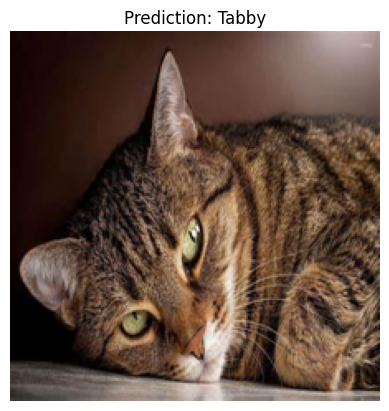

In [75]:
plt.imshow(cat)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [ ]:
tf.keras.datasets.small365